In [1]:
%matplotlib inline
import numpy as np
from frequencyoptimizer import PulsarNoise,FrequencyOptimizer

In [2]:
def run(psrnoise,numin=0.08,numax=10.0,nchan=60,log=True,nsteps=25,frac_bw=False,full_bandwidth=False,minimum=None,points=None,DIR="",arrowcalc=None,masks=None):
    freqopt = FrequencyOptimizer(psrnoise,numin=numin,numax=numax,nchan=nchan,log=log,nsteps=nsteps,frac_bw=frac_bw,full_bandwidth=full_bandwidth,masks=masks)
    freqopt.calc()
    if len(DIR) > 0 and DIR[-1] != "/":
        DIR += "/"
    if arrowcalc is not None:
        colorbararrow = freqopt.calc_single(arrowcalc)
    else:
        colorbararrow = None
    freqopt.plot("%s%s.png"%(DIR,psrnoise.name),doshow=True,minimum=minimum,points=points,colorbararrow=colorbararrow)



Computing center freq 0.080 GHz (0/42)
Computing center freq 0.090 GHz (1/42)
Computing center freq 0.101 GHz (2/42)
Computing center freq 0.114 GHz (3/42)
Computing center freq 0.128 GHz (4/42)
Computing center freq 0.144 GHz (5/42)
Computing center freq 0.162 GHz (6/42)
Computing center freq 0.182 GHz (7/42)
Computing center freq 0.205 GHz (8/42)
Computing center freq 0.231 GHz (9/42)
Computing center freq 0.260 GHz (10/42)
Computing center freq 0.292 GHz (11/42)
Computing center freq 0.329 GHz (12/42)
Computing center freq 0.370 GHz (13/42)
Computing center freq 0.416 GHz (14/42)
Computing center freq 0.468 GHz (15/42)
Computing center freq 0.526 GHz (16/42)
Computing center freq 0.592 GHz (17/42)
Computing center freq 0.666 GHz (18/42)
Computing center freq 0.750 GHz (19/42)
Computing center freq 0.843 GHz (20/42)
Computing center freq 0.949 GHz (21/42)
Computing center freq 1.067 GHz (22/42)
Computing center freq 1.201 GHz (23/42)
Computing center freq 1.351 GHz (24/42)
Computing 

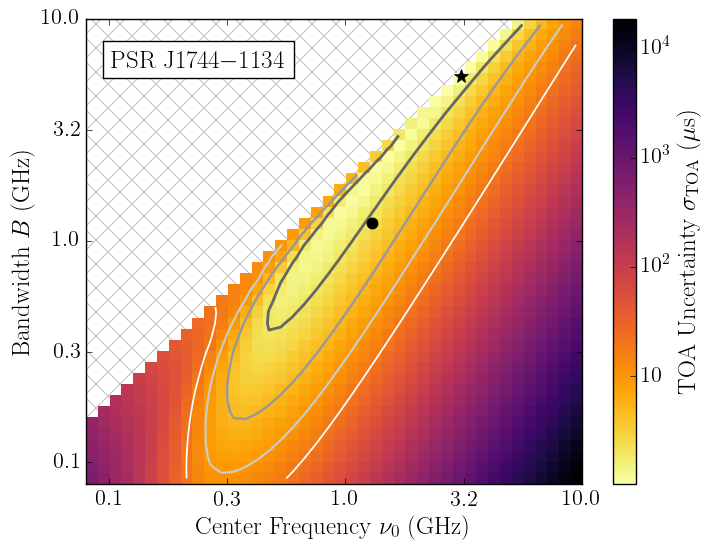

In [3]:
NCHAN = 20 #number of channels (in log frequency) to break up the band into to build covariance matrices
NSTEPS = 20
'''
alpha = pulsar spectral index
beta = galactic noise background index
taud = scattering timescale (at 1 GHz, I allow for other values but haven't allowed for a way to supply an argument yet)
A_e = effective area. May switch to gain. A_e = 5520.0 -> 2.0 K/Jy (GBT)
I_0 = flux density in mJy (at 1 GHz)
EM = emission measure. Right now just derived from DM^2 / D
T_e = electron temperature in K
tauvar = variation in the scattering timescale. I use the (max-min)/2 from Lina's paper to represent that range, otherwise it's just half the scattering timescale
dtd = scintillation timescale in seconds
Weffs = effective widths over the channels in microseconds
sigma_Js = jitter in microseconds. Implicit is that this is a 30 minute observation, need to allow for a way to supply that argument
'''
psrnoiseJ1744 = PulsarNoise("J1744-1134",alpha=1.49,beta=2.75,taud=26.1e-3,A_e=5520.0,I_0=4.888,DM=3.14,D=0.42,tauvar=12.2e-3,dtd=1272.2,Weffs=np.zeros(NCHAN)+511.0,W50s=np.zeros(NCHAN)+136.8,sigma_Js=np.zeros(NCHAN)+0.066)  #jitter upper limit
run(psrnoiseJ1744,nchan=NCHAN,nsteps=NSTEPS,minimum='k*',points=(1.3,1.2,'ko'))#,nsteps=100,frac_bw=True)